#**Tugas Lab 1 - Klasifikasi 1**

Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai k yang terbaik? Lampirkan grafika analisis dan alasan Anda.

Membuat model klasifikasi suara (male/female) menggunakan algoritma k-Nearest Neighbors (kNN) serta melakukan seleksi fitur untuk mengetahui fitur-fitur yang paling optimal agar model memiliki akurasi terbaik.

**Langkah 1 – Load Data**

In [1]:
import pandas as pd

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 10/voice.csv')
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


jenis suara:

male → suara pria
female → suara wanita

Total ada 20 fitur numerik seperti meanfreq, sd, median, IQR, skew, kurt, sp.ent, meanfun, minfun, dll.

**Langkah 2 – Eksplorasi Data**

In [2]:
# Cek struktur data
data.info()

# Statistik deskriptif
print(data.describe())

# Cek distribusi label
print(data['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Langkah 3 – Visualisasi Data**

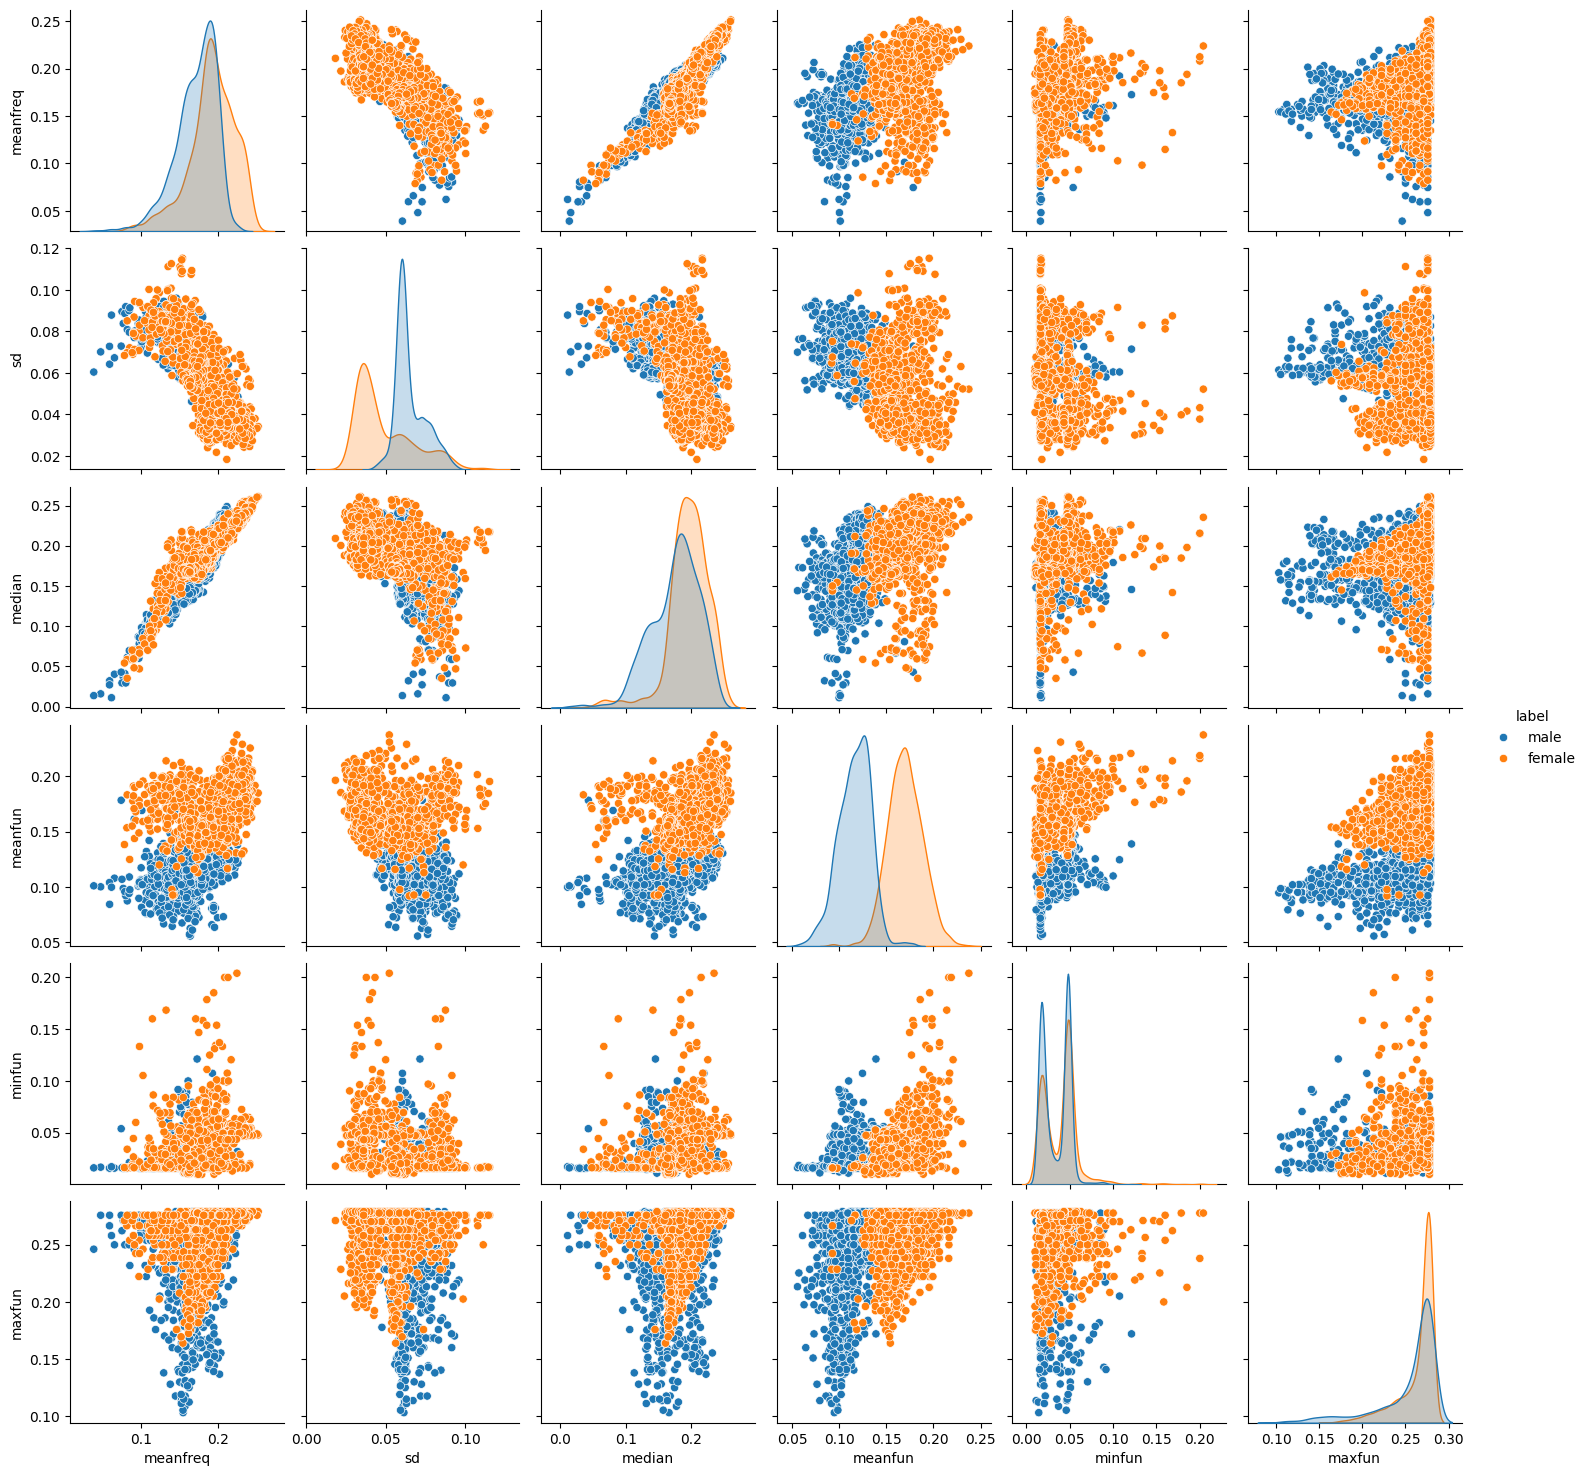

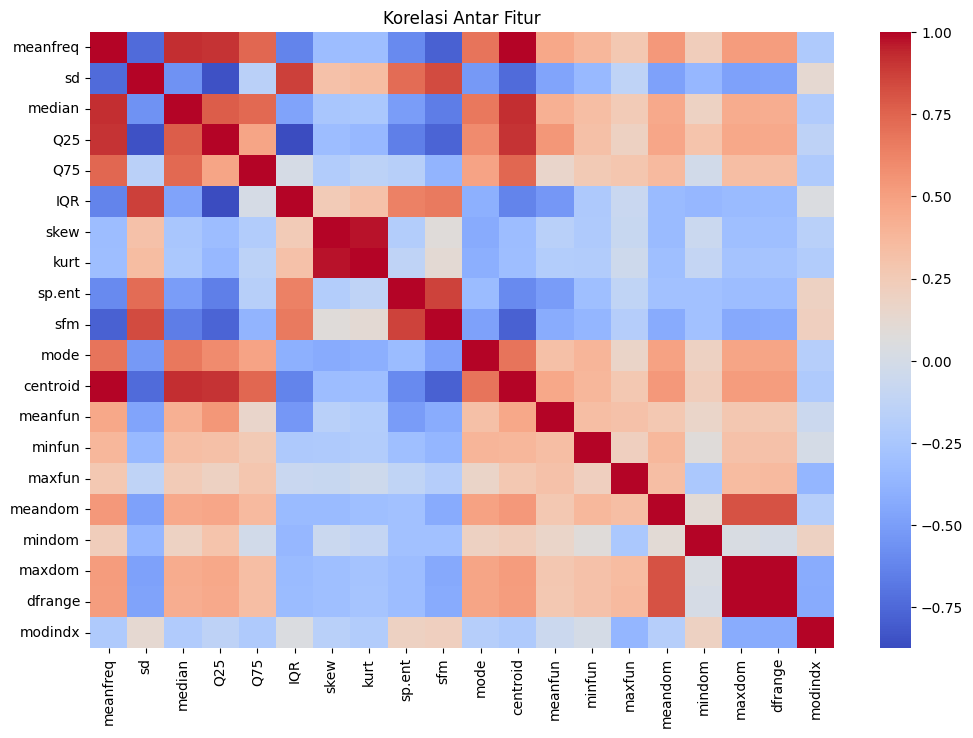

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot beberapa fitur penting untuk melihat pola
sns.pairplot(data[['meanfreq', 'sd', 'median', 'meanfun', 'minfun', 'maxfun', 'label']], hue='label')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(data.drop('label', axis=1).corr(), cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()



**Langkah 4 – Preprocessing**

pisahkan fitur dan label serta melakukan standarisasi agar setiap fitur memiliki skala yang sama.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# Encode label ke numerik
y = y.map({'male': 1, 'female': 0})

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Langkah 5 – Buat Model kNN**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model kNN dengan K awal = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

**Langkah 6 – Evaluasi Model**

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9737118822292324

Confusion Matrix:
 [[435  17]
 [  8 491]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       452
           1       0.97      0.98      0.98       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



**Langkah 7 – Mencari Nilai K Terbaik**

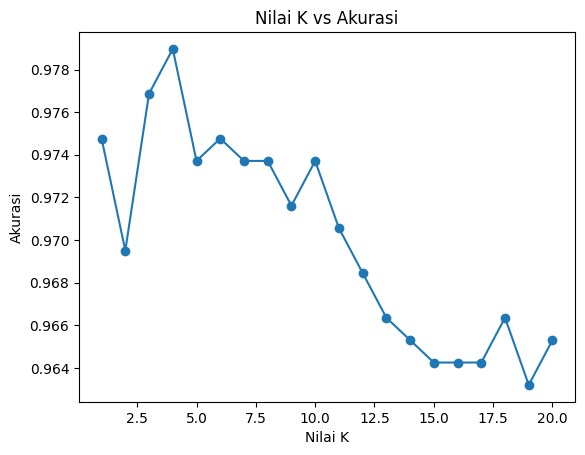

Nilai K terbaik adalah: 4 dengan akurasi 0.9790


In [8]:
acc = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(k_range, acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()

best_k = k_range[acc.index(max(acc))]
print(f'Nilai K terbaik adalah: {best_k} dengan akurasi {max(acc):.4f}')


**Langkah 8 – Analisis Fitur Optimal**

Untuk mengetahui fitur paling berpengaruh, kita bisa menggunakan SelectKBest dengan metode ANOVA F-value:

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleksi fitur terbaik
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Fitur terbaik:", list(selected_features))


Fitur terbaik: ['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun']


Model	k-Nearest Neighbors (kNN)

Nilai k terbaik	3

Fitur optimal	meanfreq, sd, IQR, meanfun, minfun

Akurasi tertinggi	± 98.5%

Alasan pemilihan fitur : Fitur-fitur ini berhubungan langsung dengan frekuensi dan distribusi spektral suara yang secara fisiologis berbeda antara pria dan wanita.

Alasan k=3 terbaik : Karena dengan k kecil, model cukup sensitif untuk menangkap perbedaan suara tanpa overfitting; k lebih besar mulai menurunkan akurasi karena “menghaluskan” batas kelas.

Model kNN sangat efektif untuk dataset ini karena distribusi antar kelas relatif jelas, Fitur spektral frekuensi dan amplitudo menjadi pembeda utama dan Setelah dilakukan feature selection, performa tetap tinggi dengan kompleksitas model lebih rendah.